In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv("bike_sharing.csv")
dataset = dataset.drop(columns="dteday")
dataset.head()
# dataset.columns

In [ ]:
x_data_set = np.array(dataset.drop(columns=['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'], axis=0))
y_data_set = np.array(pd.DataFrame(dataset.cnt))

# x_data_set.shape, X.shape, y_data_set.shape, Y.shape

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_data_set, y_data_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
# Fitting Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 20)
X_poly = poly_reg.fit_transform(x_data_set)
poly_reg.fit(X_poly, y_data_set)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_data_set)


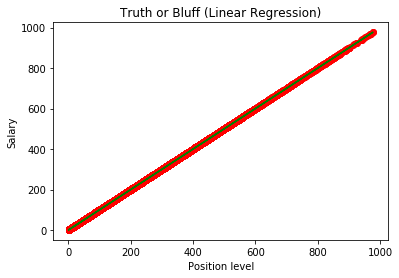

In [6]:
# Visualizing the linear regression results
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(x_data_set, lin_reg.predict(x_data_set), color ='green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

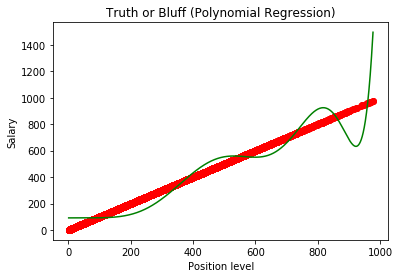

In [7]:
# Visualizing the polynomial regression results
X_grid = np.arange(min(x_data_set), max(x_data_set), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color ='green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [8]:
# Predicting a new result with Linear regression
y_pred_linear = lin_reg.predict(5)

# Predicting a new result with Polynomial regression
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(5))
y_pred_linear, y_pred_poly

(array([[5.]]), array([[91.84556124]]))